<a href="https://colab.research.google.com/github/troncosofranco/Deep-Learning-Projects/blob/main/Tensorflow_w/MLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import modules

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score
!pip install mlflow
import mlflow
import mlflow.tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.

Print the version of the modules.

In [4]:
print("TensorFlow: {}".format(tf.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("Numpy: {}".format(np.__version__))
print("MLFlow: {}".format(mlflow.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))

TensorFlow: 2.9.2
Scikit-Learn: 1.0.2
Numpy: 1.21.6
MLFlow: 2.1.1
Matplotlib: 3.2.2


#2. Load Data

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#3. Explore data

Class:  5


(<matplotlib.image.AxesImage at 0x7f84d9ca9610>, None)

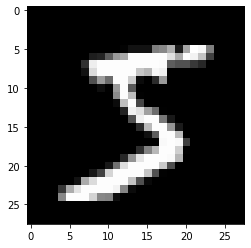

In [6]:
plt.imshow(x_train[0], cmap='gray'), print("Class: ", y_train[0])

#4. Process data

Reshape images using to_categorical(). This converts each sample from an integer value of say 2 or 4 corresponding to the digit represented by the x samples into a one-hot encoded vector. Samples in this format are now 0 vectors with a num_classes number of digits.

In [7]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 
x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 
x_test.shape[2], 1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
print("Shapes")
print("x_train: {}\ny_train: {}".format(x_train.shape, y_train.shape))
print("x_test: {}\ny_test: {}".format(x_test.shape, y_test.shape))

Shapes
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


#5. MLFlow Run – Training and Evaluating

Define the model.

In [9]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=2, 
padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(filters=8, kernel_size=3, strides=2, 
padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Flatten())
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 30)                11790     
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 13,940
Trainable params: 13,940
Non-traina

Compile the model using the Adam optimizer and categorical cross-entropy for the loss. Accuracy is the only metric.

In [10]:
model.compile(optimizer="Adam", 
loss="categorical_crossentropy", metrics=["accuracy"])

Run MLFlow log

In [11]:
mlflow.set_experiment("TF_Keras_MNIST")
with mlflow.start_run():
    mlflow.tensorflow.autolog()

    model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)
    preds = model.predict(x_test)
    preds = np.round(preds)

    eval_acc = model.evaluate(x_test, y_test)[1]
    auc_score = roc_auc_score(y_test, preds)

    print("eval_acc: ", eval_acc)
    print("auc_score: ", auc_score)

    mlflow.tensorflow.mlflow.log_metric("eval_acc", eval_acc)
    mlflow.tensorflow.mlflow.log_metric("auc_score", auc_score)

mlflow.end_run()

2023/01/11 20:22:06 INFO mlflow.tracking.fluent: Experiment with name 'TF_Keras_MNIST' does not exist. Creating a new experiment.


Epoch 1/10
235/235 [==============================] - 8s 29ms/step - loss: 1.5326 - accuracy: 0.6186
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.3258 - accuracy: 0.9087
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.2000 - accuracy: 0.9421
Epoch 4/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1455 - accuracy: 0.9564
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1150 - accuracy: 0.9652
Epoch 6/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0959 - accuracy: 0.9706
Epoch 7/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0813 - accuracy: 0.9750
Epoch 8/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0735 - accuracy: 0.9779
Epoch 9/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0647 - accuracy: 0.9799
Epoch 10/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0603 - accura

2023/01/11 20:23:29 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/01/11 20:23:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/01/11 20:23:39 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpcptn9vsd/model, flavor: tensorflow), fall back to return ['tensorflow==2.9.2']. Set logging level to DEBUG to see the full traceback.


313/313 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9754
eval_acc:  0.9753999710083008
auc_score:  0.9857461752201357


#6. Loading an MLFlow Model

Load model and calculate the same logged evaluation previously. This ensures that the model is the same and demonstrates that 
you can use the model to make predictions.


In [13]:
# loaded_model = mlflow.keras.load_model("runs:/YOUR_RUN_ID/model")
# eval_loss, eval_acc = loaded_model.evaluate(x_test, y_test)
# preds = loaded_model.predict(x_test)
# preds = np.round(preds)
# eval_auc = roc_auc_score(y_test, preds)
# print("Eval Loss:", eval_loss)
# print("Eval Acc:", eval_acc)
# print("Eval AUC:", eval_auc)